In [43]:
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv("E:/Learning/DataSet/simple_customer_data.csv")

In [45]:
df.head(10)

,CustomerID,Age,MonthlySpend,VisitsPerMonth,SatisfactionScore
0,1,56,180,8,1
1,2,46,661,11,4
2,3,32,971,3,5
3,4,25,487,1,4
4,5,38,101,8,5
5,6,56,489,3,5
6,7,36,665,3,3
7,8,40,205,1,5
8,9,28,871,11,4
9,10,28,921,5,5


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   CustomerID         50 non-null     int64
 1   Age                50 non-null     int64
 2   MonthlySpend       50 non-null     int64
 3   VisitsPerMonth     50 non-null     int64
 4   SatisfactionScore  50 non-null     int64
dtypes: int64(5)
memory usage: 2.1 KB


In [47]:
df.describe()

,CustomerID,Age,MonthlySpend,VisitsPerMonth,SatisfactionScore
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,37.540000,571.700000,7.260000,3.020000
std,14.57738,11.754652,281.818457,3.926935,1.477588
min,1.00000,19.000000,101.000000,1.000000,1.000000
25%,13.25000,28.000000,324.750000,3.000000,1.250000
50%,25.50000,38.000000,568.500000,7.500000,3.000000
75%,37.75000,45.000000,828.250000,10.000000,4.000000
max,50.00000,59.000000,978.000000,14.000000,5.000000


In [48]:
corr = df.corr()
corr.round(2)

,CustomerID,Age,MonthlySpend,VisitsPerMonth,SatisfactionScore
CustomerID,1.00,-0.19,-0.04,0.18,-0.37
Age,-0.19,1.00,-0.05,-0.05,0.06
MonthlySpend,-0.04,-0.05,1.00,0.02,0.08
VisitsPerMonth,0.18,-0.05,0.02,1.00,-0.29
SatisfactionScore,-0.37,0.06,0.08,-0.29,1.00


In [49]:
df['Age'].aggregate(['min','max','mean'])

min     19.00
max     59.00
mean    37.54
Name: Age, dtype: float64

In [50]:
df[['Age','MonthlySpend']].sort_values(by='MonthlySpend',ascending= False).head(10)

,Age,MonthlySpend
31,20,978
2,32,971
18,47,962
44,37,956
45,45,938
9,28,921
19,55,915
42,43,912
33,24,891
8,28,871


In [51]:
df.loc[(df['Age']>19) & (df['Age']<31), ['Age','MonthlySpend']].sort_values(by='Age', ascending= True)

,Age,MonthlySpend
14,20,655
31,20,978
38,21,592
33,24,891
46,24,620
47,25,443
3,25,487
35,26,863
41,26,114
8,28,871


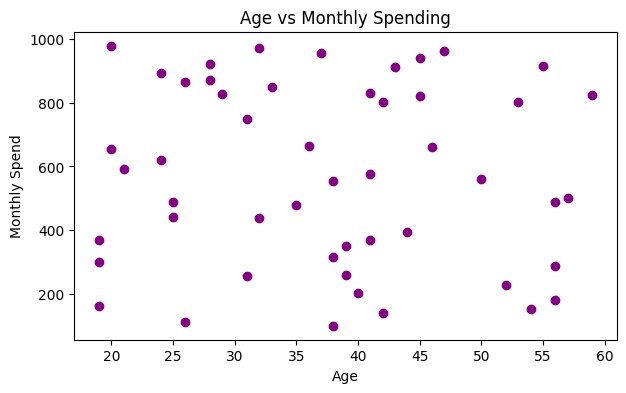

In [213]:
plt.figure(figsize=(7,4))
plt.scatter(df['Age'], df['MonthlySpend'], color= 'purple')
plt.xlabel('Age')
plt.ylabel('Monthly Spend')
plt.title('Age vs Monthly Spending')
plt.show()

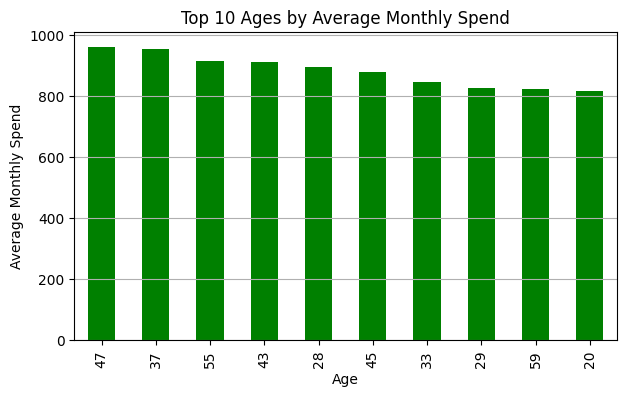

In [214]:
topTenCustomer = df.groupby('Age')['MonthlySpend'].mean().sort_values(ascending= False).head(10)
plt.figure(figsize=(7,4))
topTenCustomer.plot(kind='bar', color= 'green')
plt.title('Top 10 Ages by Average Monthly Spend')
plt.xlabel('Age')
plt.ylabel('Average Monthly Spend')
plt.grid(axis='y')
plt.show()

In [76]:
df.columns

Index(['CustomerID', 'Age', 'MonthlySpend', 'VisitsPerMonth',
       'SatisfactionScore'],
      dtype='object')

In [82]:
df[['CustomerID','VisitsPerMonth','MonthlySpend']].sort_values(by='VisitsPerMonth', ascending = False).head(10)

,CustomerID,VisitsPerMonth,MonthlySpend
35,36,14,863
23,24,14,826
41,42,14,114
48,49,13,228
18,19,12,962
47,48,12,443
14,15,12,655
27,28,12,824
8,9,11,871
43,44,11,164


In [90]:
avgSpend= df['MonthlySpend'].mean()
avgVisit = df['VisitsPerMonth'].mean()
print('Average Spend: ', avgSpend)
print('Average Visit: ', avgVisit)

Average Spend:  571.7
Average Visit:  7.26


In [93]:
customerSpendVisitMore = df[((df['MonthlySpend']) > avgSpend) & ((df['VisitsPerMonth']) > avgVisit)]

In [94]:
customerSpendVisitMore

,CustomerID,Age,MonthlySpend,VisitsPerMonth,SatisfactionScore
1,2,46,661,11,4
8,9,28,871,11,4
10,11,41,576,10,3
13,14,41,829,9,2
14,15,20,655,12,2
18,19,47,962,12,4
23,24,29,826,14,3
27,28,59,824,12,1
28,29,45,819,8,1
35,36,26,863,14,3


In [205]:
visitsPerMonth = df.groupby('VisitsPerMonth')['MonthlySpend'].mean().sort_values(ascending= False)

In [206]:
visitsPerMonth

VisitsPerMonth
2     915.000000
6     848.000000
12    721.000000
9     695.333333
3     677.875000
5     657.500000
14    601.000000
7     557.833333
10    555.000000
11    533.250000
8     364.000000
1     338.600000
13    228.000000
Name: MonthlySpend, dtype: float64

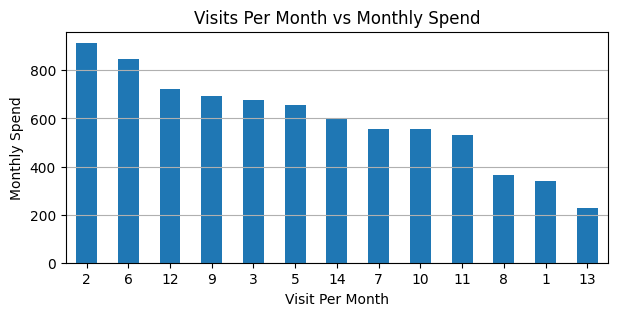

In [209]:
plt.figure(figsize=(7,3))
visitsPerMonth.plot(kind='bar')
plt.ylabel('Monthly Spend')
plt.xlabel('Visit Per Month')
plt.title('Visits Per Month vs Monthly Spend')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [109]:
df.columns

Index(['CustomerID', 'Age', 'MonthlySpend', 'VisitsPerMonth',
       'SatisfactionScore'],
      dtype='object')

In [114]:
df[['CustomerID','SatisfactionScore','MonthlySpend']].sort_values(by= 'SatisfactionScore', ascending = False).head(10)

,CustomerID,SatisfactionScore,MonthlySpend
4,5,5,101
2,3,5,971
9,10,5,921
17,18,5,369
5,6,5,489
7,8,5,205
15,16,5,261
33,34,5,891
38,39,5,592
1,2,4,661


In [116]:
avgSatisfactionScore = df['SatisfactionScore'].mean()
print(avgSatisfactionScore)

3.02


In [118]:
df[(df['SatisfactionScore']>avgSatisfactionScore) & (df['MonthlySpend']> avgSpend)].sort_values(by='MonthlySpend', ascending= False)

,CustomerID,Age,MonthlySpend,VisitsPerMonth,SatisfactionScore
2,3,32,971,3,5
18,19,47,962,12,4
45,46,45,938,10,4
9,10,28,921,5,5
19,20,55,915,2,4
42,43,43,912,7,4
33,34,24,891,3,5
8,9,28,871,11,4
25,26,42,801,5,4
49,50,31,747,3,4


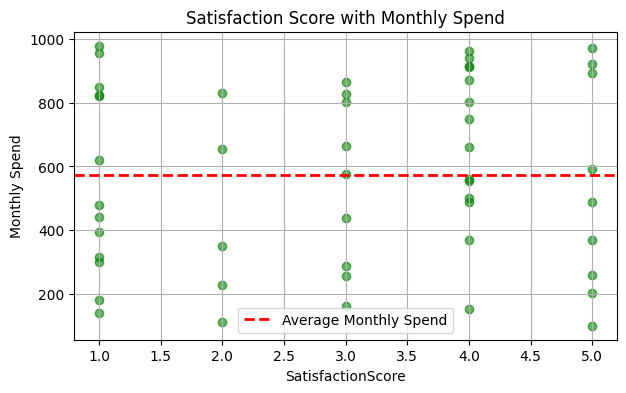

In [212]:
plt.figure(figsize=(7,4))
plt.scatter(df['SatisfactionScore'],df['MonthlySpend'], color='green', alpha=0.6)
plt.title('Satisfaction Score with Monthly Spend')

# Draw horizontal average line
plt.axhline(avgSpend, linestyle='--',color='red', linewidth=2, label='Average Monthly Spend')
plt.xlabel('SatisfactionScore')
plt.ylabel('Monthly Spend')
plt.grid(True)
plt.legend()
plt.show()

In [120]:
satisfactionScore = df.groupby('SatisfactionScore')['MonthlySpend'].mean().sort_values(ascending= False)

In [121]:
print(satisfactionScore)

SatisfactionScore
4    673.785714
1    561.461538
3    541.777778
5    533.333333
2    435.400000
Name: MonthlySpend, dtype: float64


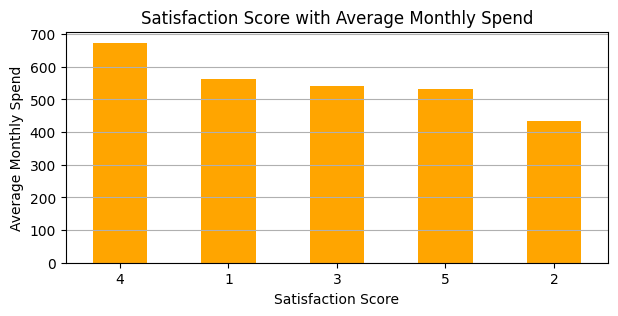

In [210]:
plt.figure(figsize=(7,3))
satisfactionScore.plot(kind='bar',color='orange')
plt.title('Satisfaction Score with Average Monthly Spend')
plt.xlabel('Satisfaction Score')
plt.ylabel('Average Monthly Spend')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [154]:
morePaidCustomers = df.groupby('CustomerID')[['MonthlySpend','VisitsPerMonth']].sum().sort_values(by= 'MonthlySpend', ascending= False).head(5)

In [155]:
morePaidCustomers

,MonthlySpend,VisitsPerMonth
CustomerID,,
32,978,3
3,971,3
19,962,12
45,956,9
46,938,10


In [191]:
loyalCustomer = df[(df['VisitsPerMonth']>avgVisit)]

In [192]:
loyalCustomer

,CustomerID,Age,MonthlySpend,VisitsPerMonth,SatisfactionScore
0,1,56,180,8,1
1,2,46,661,11,4
4,5,38,101,8,5
8,9,28,871,11,4
10,11,41,576,10,3
12,13,57,501,10,4
13,14,41,829,9,2
14,15,20,655,12,2
16,17,19,301,9,1
17,18,41,369,8,5


In [193]:
normalCustomer = df[df['VisitsPerMonth']<avgVisit]

In [194]:
normalCustomer

,CustomerID,Age,MonthlySpend,VisitsPerMonth,SatisfactionScore
2,3,32,971,3,5
3,4,25,487,1,4
5,6,56,489,3,5
6,7,36,665,3,3
7,8,40,205,1,5
9,10,28,921,5,5
11,12,53,802,7,3
15,16,39,261,7,5
19,20,55,915,2,4
20,21,19,370,1,4


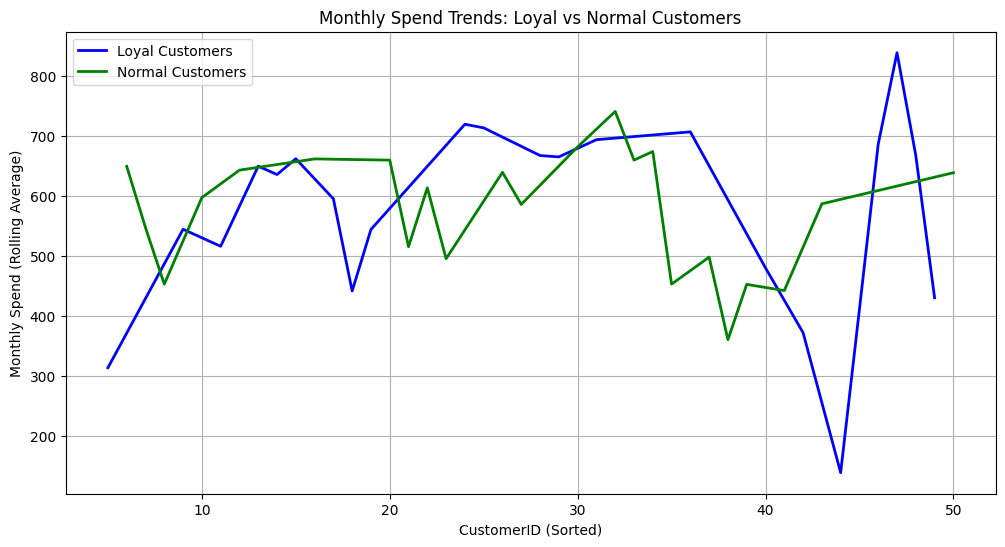

In [196]:
dfSorted = df.sort_values("CustomerID")
loyalSorted = loyalCustomer.sort_values("CustomerID")
normalSorted = normalCustomer.sort_values("CustomerID")
plt.figure(figsize=(12,6))
# plt.plot(dfSorted['CustomerID'], dfSorted['MonthlySpend'].rolling(3).mean(),  color='red', label='Loyal Customers', linewidth=2)
plt.plot(loyalSorted['CustomerID'], loyalSorted['MonthlySpend'].rolling(3).mean(),  color='blue', label='Loyal Customers', linewidth=2)
plt.plot(normalSorted['CustomerID'], normalSorted['MonthlySpend'].rolling(3).mean(),  color='green', label='Normal Customers', linewidth=2)
plt.xlabel("CustomerID (Sorted)")
plt.ylabel("Monthly Spend (Rolling Average)")
plt.title("Monthly Spend Trends: Loyal vs Normal Customers")
plt.legend()
plt.grid(True)
plt.show()

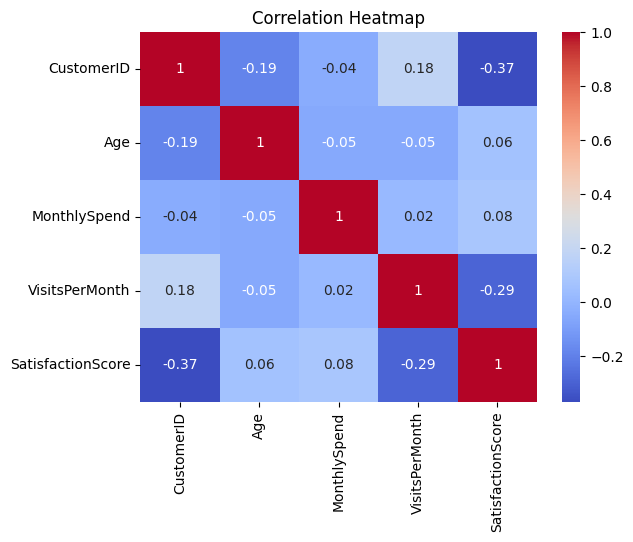

In [199]:
import seaborn as sns

sns.heatmap(df.corr().round(2), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
